## 1. 필요한 패키지 로드

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

import glob

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
import random

## 2. 파일 불러오기

In [2]:
path = 'C:/Users/user/Desktop/16017005/creditcard'

In [3]:
import os
os.listdir(path)

['.ipynb_checkpoints',
 'catboost_info',
 'logs.log',
 'newcard_test.csv',
 'newcard_train.csv',
 'sample_submission.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb']

## 3. sklearn 
train and test split

In [4]:
train = pd.read_csv(path+'/newcard_train.csv',engine='python', index_col = 'index' )

In [5]:
test = pd.read_csv(path+'/newcard_test.csv',engine='python', index_col = 'index' )

In [13]:
from sklearn.model_selection import train_test_split

# load sample
target = train['credit']

# train_test_split

train_X = train.loc[:,'income_total':]
train_Y = train.loc[:,'credit']
test_X = train.loc[:,'income_total':]
test_Y = train.loc[:,'credit']

train_X, test_X, train_Y, test_Y = train_test_split(train, target, test_size=0.2, shuffle=True, stratify=target, random_state=123)
train_X.drop(['credit'], axis='columns', inplace=True)
test_X.drop(['credit'], axis='columns', inplace=True)

In [14]:
train_X

,income_total,income_type,edu_type,family_type,house_type,occyp_type,family_size,begin_month,gender_M,car_Y,...,email_1,work_phone_1,income_cut,DAYS_BIRTH_month,DAYS_BIRTH_week,DAYS_EMPLOYED_month,DAYS_EMPLOYED_week,before_EMPLOYED,before_EMPLOYED_month,before_EMPLOYED_week
index,,,,,,,,,,,,,,,,,,,,,
20287,-0.955143,2,4,1,1,6,3.0,1.139950,0,1,...,0,0,0,8.0,0.0,4.0,1.0,9488,4.0,3.0
17995,-0.601773,4,1,1,1,6,4.0,1.985400,0,0,...,1,0,0,6.0,3.0,7.0,0.0,7528,10.0,3.0
9851,-0.292575,4,1,1,0,6,2.0,1.925011,0,1,...,0,1,0,7.0,1.0,11.0,1.0,21838,7.0,3.0
18225,-0.071719,2,4,3,1,6,2.0,-1.517177,0,0,...,0,0,0,4.0,3.0,8.0,2.0,9617,8.0,1.0
12583,0.369992,4,4,1,1,2,2.0,0.656836,1,1,...,0,0,1,5.0,1.0,4.0,0.0,13362,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,-0.292575,1,4,1,1,4,2.0,2.045789,0,0,...,0,0,0,1.0,3.0,0.0,0.0,20578,1.0,3.0
22268,0.149136,4,4,1,1,2,4.0,2.045789,1,1,...,0,0,1,2.0,0.0,6.0,1.0,12117,7.0,3.0
15176,1.474271,0,1,1,1,3,2.0,-0.732117,1,1,...,0,0,2,7.0,0.0,0.0,0.0,11030,7.0,3.0


In [15]:
train_Y

index
20287    2.0
17995    2.0
9851     2.0
18225    1.0
12583    2.0
        ... 
8784     2.0
22268    2.0
15176    2.0
5216     2.0
3175     1.0
Name: credit, Length: 21165, dtype: float64

In [16]:
test_X

,income_total,income_type,edu_type,family_type,house_type,occyp_type,family_size,begin_month,gender_M,car_Y,...,email_1,work_phone_1,income_cut,DAYS_BIRTH_month,DAYS_BIRTH_week,DAYS_EMPLOYED_month,DAYS_EMPLOYED_week,before_EMPLOYED,before_EMPLOYED_month,before_EMPLOYED_week
index,,,,,,,,,,,,,,,,,,,,,
12523,-0.071719,4,4,1,1,1,2.0,0.052944,1,1,...,0,0,0,9.0,1.0,3.0,3.0,12784,6.0,2.0
1098,2.357694,0,1,1,1,8,4.0,1.321118,1,1,...,0,0,2,5.0,0.0,2.0,1.0,9816,3.0,2.0
6474,-0.071719,4,4,2,1,2,1.0,1.019172,0,0,...,1,0,0,10.0,0.0,9.0,3.0,12636,1.0,1.0
16262,-0.071719,2,4,1,1,6,4.0,-1.456788,0,0,...,0,0,0,2.0,3.0,2.0,2.0,7928,0.0,0.0
20494,0.149136,4,1,1,1,8,2.0,-1.034063,0,1,...,0,0,1,10.0,1.0,6.0,0.0,12387,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,-0.513431,4,1,1,1,5,2.0,-1.517177,0,0,...,0,0,0,3.0,0.0,5.0,3.0,13951,9.0,1.0
7080,-0.955143,1,4,1,1,4,2.0,1.260729,0,0,...,0,0,0,6.0,0.0,0.0,0.0,21426,6.0,0.0
9243,-0.513431,4,4,1,1,8,2.0,0.838004,1,1,...,0,0,0,7.0,2.0,7.0,2.0,7919,11.0,3.0


In [17]:
test_Y

index
12523    2.0
1098     2.0
6474     1.0
16262    1.0
20494    1.0
        ... 
1159     1.0
7080     2.0
9243     0.0
19375    1.0
20835    2.0
Name: credit, Length: 5292, dtype: float64

## 4. 모델링

In [22]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss
import time
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

results=[]
i=0
random_state=123
skf = StratifiedKFold(n_splits=10, random_state=123)
#skf = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
for train_idx, validation_idx in skf.split(train_X,train_Y):
    x_train = train_X.iloc[train_idx,:]
    y_train = train_Y.iloc[train_idx]
    x_validation = train_X.iloc[validation_idx,:]
    y_validation = train_Y.iloc[validation_idx]
    # 1. Logistic regression    
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'LogisticRegression',logloss_train,logloss_validation,training_time])
    # 2. Decision tree
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'DecisionTree',logloss_train,logloss_validation,training_time])
    # 3. Support vector machine
#     from sklearn.svm import SVC
#     model = SVC(probability=True)
#     start_time = time.time()
#     model.fit(x_train, y_train)
#     training_time = time.time() - start_time
#     y_pred_train = model.predict_proba(x_train)
#     y_pred_validation = model.predict_proba(x_validation)
#     logloss_train = log_loss(y_train, y_pred_train)
#     logloss_validation = log_loss(y_validation, y_pred_validation)
#     results.append([i,'SupportVectorMachine',logloss_train,logloss_validation,training_time])
    # 4. Gaussian naive bayes
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'GaussianNaiveBayes',logloss_train,logloss_validation,training_time])
    # 5. K nearest neighbor
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'KNearestNeighbor',logloss_train,logloss_validation,training_time]) 
    # 6. Random forest
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'RandomForest',logloss_train,logloss_validation,training_time])
    # 7. Gradient boosing
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'GradientBoosing',logloss_train,logloss_validation,training_time])
    # 8. Neural network
    from sklearn.neural_network import MLPClassifier
    model = MLPClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'NeuralNetwork',logloss_train,logloss_validation,training_time])
#     # 9. Bagging classifier
#     from sklearn.ensemble import BaggingClassifier
#     model = BaggingClassifier()
#     start_time = time.time()
#     model.fit(x_train, y_train)
#     training_time = time.time() - start_time
#     y_pred_train = model.predict_proba(x_train)
#     y_pred_validation = model.predict_proba(x_validation)
#     logloss_train = log_loss(y_train, y_pred_train)
#     logloss_validation = log_loss(y_validation, y_pred_validation)
#     results.append([i,'BaggingClassifier',logloss_train,logloss_validation,training_time])
    # 10. Extra trees
    from sklearn.ensemble import ExtraTreesClassifier
    model = ExtraTreesClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'ExtraTrees',logloss_train,logloss_validation,training_time])    
    # 11. Adaboost
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'AdaBoost',logloss_train,logloss_validation,training_time])    
    # 12. XGboost
    from xgboost import XGBClassifier
    model = XGBClassifier(eval_metric='logloss')
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'XGBoost',logloss_train,logloss_validation,training_time])    
    # 13. LightGBM
    from lightgbm import LGBMClassifier
    model = LGBMClassifier()
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'lightGBM',logloss_train,logloss_validation,training_time])    
    # 14. Catboost
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time
    y_pred_train = model.predict_proba(x_train)
    y_pred_validation = model.predict_proba(x_validation)
    logloss_train = log_loss(y_train, y_pred_train)
    logloss_validation = log_loss(y_validation, y_pred_validation)
    results.append([i,'CatBoostClassifier',logloss_train,logloss_validation,training_time])    
    i+=1


In [23]:
df_results =pd.DataFrame(data=results, 
                columns= ['iter','method','logloss_train','logloss_validation','training_time'])
df_results.tail(20)

,iter,method,logloss_train,logloss_validation,training_time
100,8,RandomForest,0.179080,0.968897,3.101630
101,8,GradientBoosing,0.768332,0.789773,9.810416
102,8,NeuralNetwork,6.134860,6.157122,4.872742
103,8,ExtraTrees,0.028698,2.672140,2.872896
104,8,AdaBoost,1.081007,1.081743,0.987325
105,8,XGBoost,0.520934,0.731918,5.492282
106,8,lightGBM,0.628459,0.746223,0.642848
107,8,CatBoostClassifier,0.529231,0.723497,14.771257
108,9,LogisticRegression,0.888733,0.886834,0.241574
109,9,DecisionTree,0.028698,12.781395,0.196799


In [24]:
import numpy as np
df_logloss_test = df_results.pivot_table(index='method', columns='iter')["logloss_validation"].reset_index()
df_logloss_test['mean']=np.mean(df_logloss_test, axis=1)
df_logloss_test=df_logloss_test.sort_values('mean')
df_logloss_test

iter,method,0,1,2,3,4,5,6,7,8,9,mean
1,CatBoostClassifier,0.741295,0.744652,0.755413,0.758979,0.749696,0.728386,0.747328,0.749947,0.723497,0.733885,0.743308
10,XGBoost,0.747740,0.758951,0.746130,0.771135,0.744493,0.732766,0.759065,0.744702,0.731918,0.743429,0.748033
11,lightGBM,0.756114,0.756421,0.762432,0.767650,0.753710,0.739754,0.761485,0.756912,0.746223,0.740588,0.754129
5,GradientBoosing,0.795014,0.797410,0.794786,0.803555,0.793945,0.788766,0.796897,0.803383,0.789773,0.786972,0.795050
4,GaussianNaiveBayes,0.881337,0.883386,0.871418,0.872979,0.877378,0.892509,0.891274,0.864873,0.885611,0.866674,0.878744
7,LogisticRegression,0.887457,0.887795,0.886773,0.893019,0.891515,0.887440,0.884664,0.891749,0.889642,0.886834,0.888689
9,RandomForest,1.011755,0.973019,1.022194,1.052328,0.886165,0.904444,0.952125,0.955683,0.968897,0.970540,0.969715
0,AdaBoost,1.080736,1.078071,1.081440,1.082000,1.080225,1.080750,1.081576,1.081634,1.081743,1.080591,1.080877
3,ExtraTrees,2.317255,2.653634,2.850184,2.806555,2.455609,2.510045,2.778306,2.481078,2.672140,2.730294,2.625510
6,KNearestNeighbor,4.020727,3.892949,3.904353,4.103294,3.604742,3.957470,3.883006,3.703587,3.804443,3.726964,3.860153


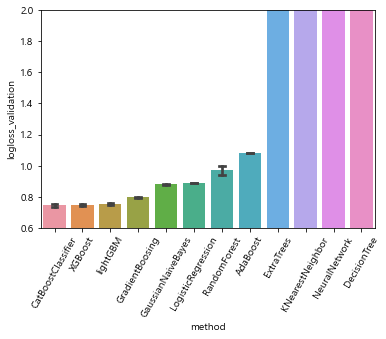

In [27]:
import seaborn as sns
#from statannot import add_stat_annotation
ax = sns.barplot(x="method", y="logloss_validation", data=df_results, capsize=.2, 
                 order=df_results.groupby('method').mean().sort_values('logloss_validation').index)
ax.set(ylim=(0.6, 2.00))
ax.set_xticklabels(ax.get_xticklabels(),rotation=60);

## 5. Feature Importance

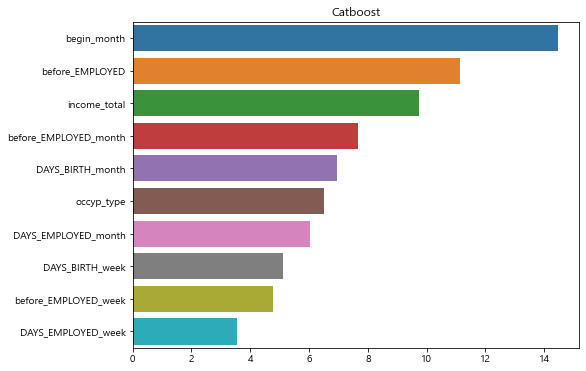

In [26]:
ft_importance_values = model.feature_importances_
plt.rcParams['font.family'] = 'Malgun Gothic'
ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top10 = ft_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
sns.barplot(x=ft_top10, y=ft_top10.index)
plt.title('Catboost')
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [36]:
y_pred_validation

array([[0.07340052, 0.09482135, 0.83177813],
       [0.10569252, 0.07722637, 0.81708111],
       [0.05175184, 0.3575039 , 0.59074425],
       ...,
       [0.19589857, 0.19330643, 0.610795  ],
       [0.04509506, 0.16727324, 0.7876317 ],
       [0.15316887, 0.84204932, 0.00478182]])

## 6. 전체 데이터로 재학습

#### catboost 모델이 가장 뛰어난 logloss 성능을 보여줌

In [62]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(n_estimators=1000, verbose=False, random_state=random_state)
start_time = time.time()
model.fit(train_X, train_Y)
training_time = time.time() - start_time
y_pred_test = model.predict_proba(test)

In [63]:
y_pred_test

array([[0.04238507, 0.19436708, 0.76324785],
       [0.25259881, 0.14551904, 0.60188215],
       [0.06313672, 0.21217555, 0.72468773],
       ...,
       [0.05057442, 0.06946395, 0.87996163],
       [0.13044295, 0.30925527, 0.56030178],
       [0.08002638, 0.42308785, 0.49688577]])

In [64]:
y_pred_test.shape

(10000, 3)

In [65]:
sub = pd.read_csv(path +'/sample_submission.csv')

## 7. csv 파일로 변환 후 제출

In [67]:
sub.iloc[:, 1:] = y_pred_test
sub

,index,0,1,2
0,26457,0.042385,0.194367,0.763248
1,26458,0.252599,0.145519,0.601882
2,26459,0.063137,0.212176,0.724688
3,26460,0.083518,0.130851,0.785631
4,26461,0.126075,0.148268,0.725658
...,...,...,...,...
9995,36452,0.100021,0.160596,0.739383
9996,36453,0.186571,0.329700,0.483729
9997,36454,0.050574,0.069464,0.879962
9998,36455,0.130443,0.309255,0.560302


In [71]:
#sub.to_csv('creditcardcsv.csv', index=False)